In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder ### available? Imho should be, like cmon
from sklearn.model_selection import train_test_split ###hopefully we're allowed to use this too

# 1. Bank data

In [3]:
bank_df = pd.read_csv('data/bank-additional-full.csv', sep=';')
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [15]:
for c in bank_df.columns:
    if bank_df[c].dtype=='O':
        print(bank_df[c].unique())

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
['married' 'single' 'divorced' 'unknown']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
['no' 'unknown' 'yes']
['no' 'yes' 'unknown']
['no' 'yes' 'unknown']
['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']
['nonexistent' 'failure' 'success']
['no' 'yes']


At first, it looks like there are no missing values in data. However, most off the categorical variables do have a special value `unknown` which is actually a missing value. While transforming the data by OHE, we can treat it like any other value or simply drop it to keep the columns linear independence. 

In [71]:
y = bank_df['y']
bank_df.drop('y', axis=1, inplace=True)

In [47]:
class Preprocessor:
    
    @staticmethod
    def train_test_split(X, y, train_subset_proportion=0.75, keep_y_balance=True):
        if set(X.index) != set(y.index):
            raise AttributeError('Indices in X and y are not indetical')
        n=X.shape[0]
        train_rows_n = int(train_subset_proportion * n)
        test_rows_n = n - train_rows_n 
        if keep_y_balance:
            if ((y.unique()!=0) & (y.unique()!=1)).any():
                raise ValueError('Using keep_y_balance requires y values to be 0 and 1.')
            pos_index = y[y==1].index
            neg_index = y[y==0].index
            train_pos_index = np.random.choice(pos_index, int(train_subset_proportion*len(pos_index)), replace=False)
            train_neg_index = np.random.choice(neg_index, int(train_subset_proportion*len(neg_index)), replace=False)
            test_pos_index = np.array(list(set(pos_index) - set(train_pos_index)))
            test_neg_index = np.array(list(set(neg_index) - set(train_neg_index)))
            train_index = np.concatenate((train_pos_index, train_neg_index))
            test_index = np.concatenate((test_pos_index, test_neg_index))
        else:
            train_index = np.random.choice(y.index, train_rows_n, replace=False)
            test_index = np.array(set(y.index) - set(train_index))
        return X.loc[train_index, :], X.loc[test_index, :], y.loc[train_index], y.loc[test_index]
    
    @staticmethod
    def remove_multicollinearity(X):
        """
        https://stackoverflow.com/questions/25676145/capturing-high-multi-collinearity-in-statsmodels
        https://en.wikipedia.org/wiki/Multicollinearity#Detection
        """
        X = X.copy()
        while True:
            corr_m = np.corrcoef(X)
            eigenvalues, eigenvectors = np.linalg.eig(corr_m)
            #TODO
            print(eigenvalues)
            break
    
    def one_hot_encoding(self):
        #TODO
        pass        
            

In [53]:
x1, x2, y1, y2 = Preprocessor.train_test_split(bank_df, bank_df['y']=='yes')

In [59]:
y1.shape

(30891,)

In [58]:
y2.shape

(10297,)

# 3. Breast Cancer Wisconsin

In [133]:
wdbc_df=pd.read_csv('data/wdbc.csv')
#X_wdbc=wdbc_df.drop([0,1], axis=1)
#train_x,test_x,train_y,test_y=Preprocessor.train_test_split(wdbc_df.drop([0,1], axis=1),wdbc_df[1])
#train_x,test_x,train_y,test_y=train_test_split(X_wdbc, y_wdbc, stratify = y_wdbc)
#removing useless columns and transforming response variable into desired form
y_wdbc=wdbc_df['diagnosis']=="M"
X_wdbc=wdbc_df.drop(columns=["id","diagnosis","Unnamed: 32"])
X_wdbc.tail()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [135]:
X_wdbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

As we can see all features are non-null numeric type variables. Which means that in this case one-hot-encoding won't be needed. The only things left to do is to remove collinear ones (maybe remove some outliers?) and split data into training and testing sets.

In [141]:
wdbc_df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,1.0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1.0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1.0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1.0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,0.0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


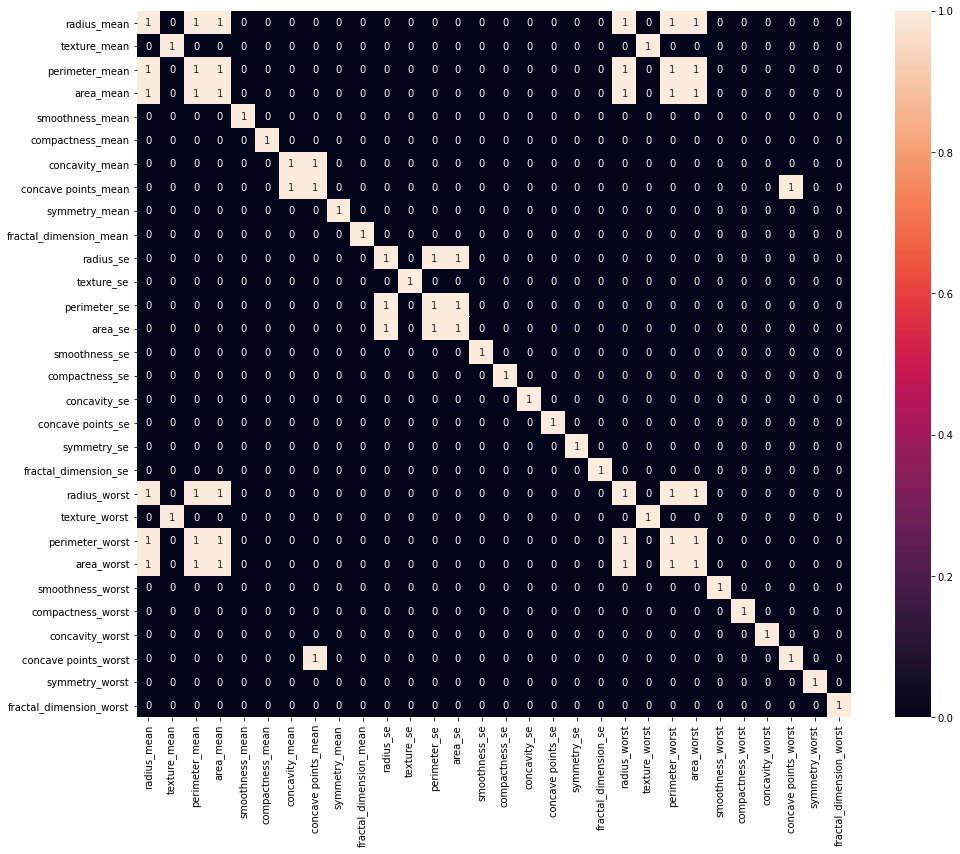

In [142]:
plt.figure(figsize=(16,13))
sns.heatmap(X_wdbc.corr()>0.9, annot=True)
plt.show()

In [87]:
cor_matrix = X_wdbc.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.65)]
len(to_drop)

<ipython-input-87-7c5dbd691a15>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


22